CLASE 10 DE OCTUBRE 2025 HPII


            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000
[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]
El out-of-bag score es: 0.644879832593859
El MSE es: 2647325000.0
El RMSLE es: 0.10352472745999938
El R2 es: 0.9671801245316117


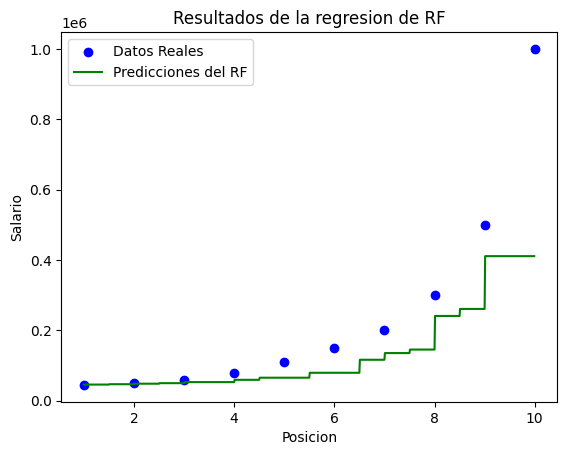

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import f1_score
# al final de cada clase habra un quiz de lo explicado  los primeros 5min
warnings.filterwarnings('ignore')

df = pd.read_csv('https://media.geeksforgeeks.org/wp-content/uploads/20250129162920569976/Position_Salaries.csv')
print(df)
x = df.iloc[:, 1:2].values     # forma de dividir los dataframe, como el slicing pero en dataframes
y = df.iloc[:, 2].values

print(x)
print(y)

# label_enconder hace que a cada categoria le pone un numero, ahi ponemos los datos categoricos, y los convierte en varias columnas con variables dummys en la clase
label_enconder = LabelEncoder()
x_categorial = df.select_dtypes(include=['object']).apply(label_enconder.fit_transform) # los que son objetos son los que tienen letras y a cada una apliquele la transformacion y estan en la clase que acabas de definir label_enconder
x_numerical = df.select_dtypes(exclude=['object']).values
x = pd.concat([pd.DataFrame(x_numerical), x_categorial], axis=1).values # esto es como concatenar pero con dataframes

#print(x)

#apply es aplique esa funcion a las otra

regressor = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True) # estimator es el numero de arnboles que quiero construir, randomstate es la semilla donde inicia, los valores que estan fueran del estimador con oobscore los introduce
regressor.fit(x, y) # proyecta la regresion

from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_log_error

oob_score = regressor.oob_score_

print(f'El out-of-bag score es: {oob_score}')

prediticions = regressor.predict(x)

mse = mean_squared_error(y, prediticions)
print(f'El MSE es: {mse}')

rmsle = root_mean_squared_log_error(y, prediticions)
print(f'El RMSLE es: {rmsle}')


r2 = r2_score(y, prediticions)
print(f'El R2 es: {r2}')

import numpy as np
#print(x)

X_grid = np.arange(min(x[:, 0]), max(x[:, 0]), 0.01)
X_grid = X_grid.reshape(-1, 1)
X_grid = np.hstack((X_grid, np.zeros((X_grid.shape[0], 2))))


plt.scatter(x[:, 0], y, color='blue', label='Datos Reales')
plt.plot(X_grid[:, 0], regressor.predict(X_grid), color='green', label='Predicciones del RF')
plt.title('Resultados de la regresion de RF')
plt.xlabel('Posicion')
plt.ylabel('Salario')
plt.legend()
plt.show()

CLASE 17 DE OCTUBRE 2025 HP11

[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]
 [1.142e+01 2.038e+01 7.758e+01 3.861e+02 1.425e-01 2.839e-01 2.414

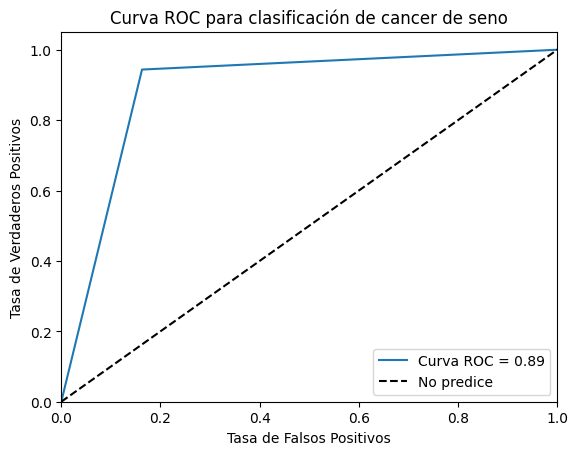

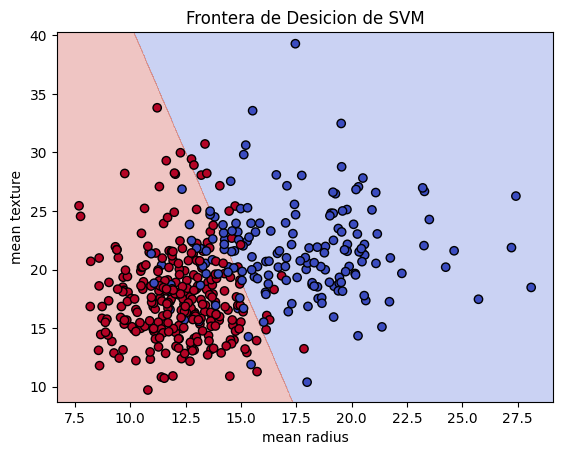

Exactitud: 0.90
              precision    recall  f1-score   support

   malignant       0.90      0.84      0.87        43
      benign       0.91      0.94      0.92        71

    accuracy                           0.90       114
   macro avg       0.90      0.89      0.90       114
weighted avg       0.90      0.90      0.90       114



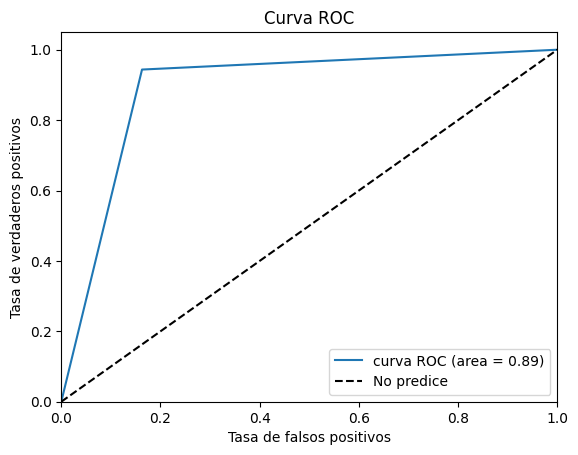

In [ ]:
# machine learning,
# clasificacion, tipo dummy o hacer regresion que es continua
# support vector machine, trazar una linea recta que te separe la mayor cantidad dos grupos de tratamiento, buscaremos la linea que este mas lejos de ambos grupos justo en medio,
# vectores de soporte, son puntos que hacen que el hiperplano se mueva, algunas veces dejare que los numeros se muevan si estan ya muy cerca,
# cuando te aprendes los errores y generalizas, sucede un overfitting, cuando te cambian las cosas y te aprendistes las cosas
# para digamas de python, funcional de manera que llamemos la funcion y no tengamos que escribir todo, tambien estan las clases como por ejemplo la clase perro y su metodo es el ladridodo, las clases es para hacer modelos
# y el codigo se hace mas reusable


import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc

data = load_breast_cancer()
print(data.data[0:9, :])

x = data.data[:, [0, 1]] # data es dato de entrada
y = data.target              # target es dato de salida, cero es no tiene cancer y 1 si tiene


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_trained_scaled = scaler.fit_transform(x_train) # le pongo fit como si fuera un modelo
x_test_scaled = scaler.transform(x_test) # al quitarle fit, el lo hace con lo que ya calculo, porque quedo en scaler

# esto es ficture ingenering, aqui transformamos los datos

# ahora vamos a ajustar el modelo, sus parametros
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42) # la C es el parametro que permite conbatir el overfitting
svm_classifier.fit(x_trained_scaled, y_train)

y_pred = svm_classifier.predict(x_test_scaled)
print(f'Exactitud: {accuracy_score(y_test, y_pred): .2f}')
print(classification_report(y_test, y_pred, target_names=data.target_names))

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr, tpr, label='Curva ROC = %0.2f' %roc_auc)
plt.plot([0,1], [0,1], 'k--', label='No predice')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')   #plt.xlabel('False positive rate')
plt.ylabel('Tasa de Verdaderos Positivos')   #plt.ylabel('True positive rate')
plt.title('Curva ROC para clasificación de cancer de seno')
plt.legend()
plt.show()


def plot_svm(x, y, model, scaler):
  h = 0.02
  x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
  y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))             # ahora vamos a crear una grilla, que sera un agray


  z = model.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()])) # c_ es el concat que pega esos vectores
  z = z.reshape(xx.shape)

  plt.contourf(xx, yy, z, cmap=plt.cm.coolwarm, alpha=0.3)
  plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
  plt.xlabel(data.feature_names[0])
  plt.ylabel(data.feature_names[1])
  plt.title('Frontera de Desicion de SVM')
  plt.show()
plot_svm(x_train, y_train, svm_classifier, scaler)

# para hacer metricas necesitamos los predichos de los verdaderos
y_pred = svm_classifier.predict(x_test_scaled)
print(f'Exactitud: {accuracy_score(y_test, y_pred):.2f}')
print(classification_report(y_test, y_pred, target_names = data.target_names))

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='curva ROC (area = %0.2f)' % roc_auc)
plt.plot([0,1], [0,1], "k--", label = "No predice")
plt.xlim([0.0, 1.0]) ###van de 0 a 1
plt.ylim([0.0, 1.05]) ###van de 0 a 1.05 porque
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.show()

###El umbral yo lo defino y trato de que sea lo más alto en tanto sea la variable de interes.
###Cada punto es un umbral
#ejm 0.4 postitive 0.4 y negative 0.1
###sobre la curva punteada no es muy bueno estar, es preferible estar encima de ella

CLASE 24 DE OCTUBRE 2025 HPII

PROYECTO

Descargando datos USD/COP (5 años diarios)...
✓ Datos cargados: 1302 días | Dólar actual: $3783 COP
✓ Indicadores calculados: returns, volatility, RSI


/tmp/ipython-input-1126165392.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('USDCOP=X', period='5y', progress=False)


✓ Datos preparados: 1282 muestras, 13 features | Train/Test: 1025/257
Entrenando modelos...
✓ Modelos entrenados: Random Forest y MLP

--- EVALUACIÓN MLP (Deep Learning) ---
Train MAE: $35 COP | R²: 0.984
Test MAE: $35 COP | R²: 0.928

--- COMPARACIÓN Random Forest ---
Test MAE: $32 COP | R²: 0.933 | OOB Score: 0.985


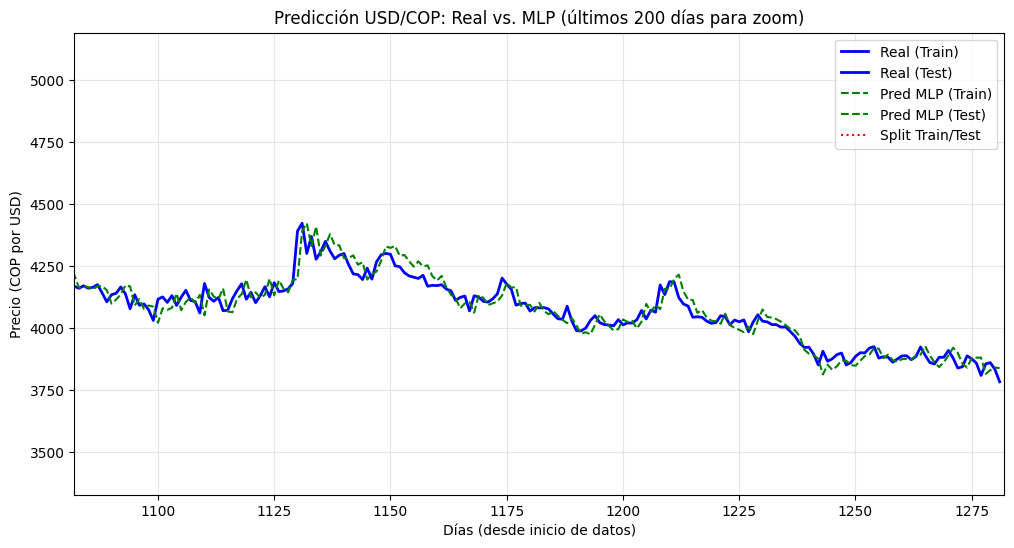


--- FORECAST 7 DÍAS (usando MLP) ---
Dólar actual: $3783 COP
Día 1 (2025-11-08): $3816 COP | Cambio: +0.9%
Día 2 (2025-11-09): $3815 COP | Cambio: +0.9%
Día 3 (2025-11-10): $3800 COP | Cambio: +0.5%
Día 4 (2025-11-11): $3795 COP | Cambio: +0.3%
Día 5 (2025-11-12): $3802 COP | Cambio: +0.5%
Día 6 (2025-11-13): $3810 COP | Cambio: +0.7%
Día 7 (2025-11-14): $3802 COP | Cambio: +0.5%


In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from sklearn.preprocessing import MinMaxScaler  # Para escalado, como en tus códigos
from sklearn.ensemble import RandomForestRegressor  # De tu código 1: regresión con árboles
from sklearn.neural_network import MLPRegressor     # De tu código 3: red neuronal profunda
from sklearn.metrics import mean_absolute_error, r2_score  # Métricas como MSE/R²
import yfinance as yf  # Para descargar datos, como en AAPL
import matplotlib.pyplot as plt  # Gráficos, como en todos tus códigos

# 1. Cargar datos históricos de USD/COP (ticker 'USDCOP=X' en yfinance)
print("Descargando datos USD/COP (5 años diarios)...")
try:
    # Descarga automática (como en tu código de AAPL)
    data = yf.download('USDCOP=X', period='5y', progress=False)
    df = data[['Open', 'High', 'Low', 'Close', 'Volume']].copy()
    df.columns = ['open', 'high', 'low', 'close', 'volume']  # Renombra para simplicidad
    # Si prefieres CSV manual: df = pd.read_csv('usd_cop.csv', index_col='Date', parse_dates=True)
except Exception as e:
    print(f"Error en descarga: {e}. Usa CSV de Investing.com.")
    ## Fallback simulado (para testing, ~5 años con volatilidad realista)
    dates = pd.date_range(end=datetime.now(), periods=1250, freq='B')  # Días hábiles
    np.random.seed(42)
    trend = np.linspace(3800, 4200, 1250)  # Tendencia histórica aproximada
    noise = np.cumsum(np.random.normal(0, 15, 1250))  # Ruido volátil
    df = pd.DataFrame({
        'close': trend + noise + 200 * np.sin(np.linspace(0, 8*np.pi, 1250)),  # Simula picos (e.g., elecciones)
        'open': trend + noise + np.random.normal(0, 5, 1250),
        'high': trend + noise + np.abs(np.random.normal(0, 20, 1250)),
        'low': trend + noise - np.abs(np.random.normal(0, 20, 1250)),
        'volume': np.random.randint(1_000_000, 5_000_000, 1250)  # Volumen ficticio
    }, index=dates)

print(f"✓ Datos cargados: {len(df)} días | Dólar actual: ${df['close'].iloc[-1]:.0f} COP")

# 2. Calcular indicadores técnicos (igual que en tu código de AAPL)
# Retornos diarios (cambio porcentual)
df['returns'] = df['close'].pct_change()
# Volatilidad (desviación estándar de retornos, ventana 20 días)
df['volatility'] = df['returns'].rolling(window=20).std()
# RSI (Relative Strength Index, para sobrecompra/sobreventa, ventana 14 días)
delta = df['close'].diff()  # Diferencia diaria
gain = delta.where(delta > 0, 0).rolling(window=14).mean()  # Ganancias promedio
loss = -delta.where(delta < 0, 0).rolling(window=14).mean()  # Pérdidas promedio
df['rsi'] = 100 - (100 / (1 + gain / loss))  # Fórmula RSI
# Llenar valores NaN hacia atrás (bfill, como en tu código)
df = df.bfill()

print("✓ Indicadores calculados: returns, volatility, RSI")

# 3. Función de extracción de features (ingeniería, adaptada de tu features() en AAPL)
# Toma una secuencia de 20 días y extrae 12 características numéricas
def extract_features(close_seq, volume_seq, volatility_seq, rsi_seq):
    """
    Extrae features para el modelo:
    - Tendencia lineal (pendiente de los últimos 20 precios)
    - Medias móviles (5 y 20 días)
    - Cambios recientes (1-5 y 1-10 días)
    - Rango (min/max últimos 20)
    - Promedios de volumen, volatilidad y RSI
    """
    return [
        np.polyfit(range(20), close_seq, 1)[0],  # Pendiente de regresión lineal (tendencia)
        np.mean(close_seq[-5:]), np.mean(close_seq),  # Medias móviles cortas/largas
        close_seq[-1] - close_seq[-5], close_seq[-1] - close_seq[-10],  # Cambios recientes
        np.min(close_seq), np.max(close_seq),  # Rango de precios
        np.mean(volume_seq), volume_seq[-1],  # Volumen promedio y actual
        np.mean(volatility_seq), volatility_seq[-1],  # Volatilidad
        np.mean(rsi_seq), rsi_seq[-1]  # RSI
    ]

# 4. Preparar datos para ML (escalado y secuencias, como en AAPL)
# Escala cada variable por separado (MinMaxScaler a [0,1])
features_to_scale = ['close', 'volume', 'volatility', 'rsi']
scalers = {k: MinMaxScaler().fit(df[[k]].dropna()) for k in features_to_scale}
scaled = {k: scalers[k].transform(df[[k]].dropna()).flatten() for k in features_to_scale}

# Crear X (features) y y (precio futuro escalado), con ventana de 20 días
X, y = [], []
window = 20  # Ventana deslizante (más corta que 60 en AAPL para simplicidad)
for i in range(window, len(df)):
    # Secuencia de los últimos 20 días escalados
    seq_close = scaled['close'][i-window:i]
    seq_volume = scaled['volume'][i-window:i]
    seq_volatility = scaled['volatility'][i-window:i]
    seq_rsi = scaled['rsi'][i-window:i]
    # Extrae features de la secuencia
    X.append(extract_features(seq_close, seq_volume, seq_volatility, seq_rsi))
    # Target: precio del día siguiente (escalado)
    y.append(scaled['close'][i])

X, y = np.array(X), np.array(y)  # Convierte a arrays numpy
split = int(0.8 * len(X))  # Divide 80% train, 20% test
print(f"✓ Datos preparados: {X.shape[0]} muestras, {X.shape[1]} features | Train/Test: {split}/{len(X)-split}")

# 5. Entrenar modelos (integra RF de código 1 y MLP de código 3)
print("Entrenando modelos...")

# Modelo 1: Random Forest (simple, robusto, como tu primer código)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, oob_score=True)  # 100 árboles, OOB para validación interna
rf_model.fit(X[:split], y[:split])

# Modelo 2: MLP Regressor (Deep Learning, como tu código de AAPL)
mlp_model = MLPRegressor(
    hidden_layer_sizes=(50, 25),  # 2 capas ocultas (50 y 25 neuronas)
    max_iter=300,  # Máximo 300 iteraciones (aumentado para convergencia)
    early_stopping=True,  # Detiene si no mejora (anti-overfitting)
    validation_fraction=0.1,  # 10% de train para validación
    random_state=42
)
mlp_model.fit(X[:split], y[:split])

print("✓ Modelos entrenados: Random Forest y MLP")

# 6. Evaluación (métricas como en tus códigos: MAE, R²)
# Función para desescalar (inversa, como denorm en AAPL)
def denormalize(x, scaler_key='close'):
    """Desescala valores usando el scaler de 'close'"""
    return scalers[scaler_key].inverse_transform(x.reshape(-1, 1)).flatten()

# Predicciones (usa MLP como principal, pero compara con RF)
y_train_pred_mlp = denormalize(mlp_model.predict(X[:split]))
y_test_pred_mlp = denormalize(mlp_model.predict(X[split:]))
y_train_actual = denormalize(y[:split])
y_test_actual = denormalize(y[split:])

# Métricas para MLP
train_mae_mlp = mean_absolute_error(y_train_actual, y_train_pred_mlp)
test_mae_mlp = mean_absolute_error(y_test_actual, y_test_pred_mlp)
train_r2_mlp = r2_score(y_train_actual, y_train_pred_mlp)
test_r2_mlp = r2_score(y_test_actual, y_test_pred_mlp)

# Comparación rápida con RF
y_test_pred_rf = denormalize(rf_model.predict(X[split:]))
test_mae_rf = mean_absolute_error(y_test_actual, y_test_pred_rf)
test_r2_rf = r2_score(y_test_actual, y_test_pred_rf)

print(f"\n--- EVALUACIÓN MLP (Deep Learning) ---")
print(f"Train MAE: ${train_mae_mlp:.0f} COP | R²: {train_r2_mlp:.3f}")
print(f"Test MAE: ${test_mae_mlp:.0f} COP | R²: {test_r2_mlp:.3f}")
print(f"\n--- COMPARACIÓN Random Forest ---")
print(f"Test MAE: ${test_mae_rf:.0f} COP | R²: {test_r2_rf:.3f} | OOB Score: {rf_model.oob_score_:.3f}")

# 7. Gráfico de predicciones vs. reales (como en tus códigos 1 y 3)
plt.figure(figsize=(12, 6))
# Datos reales
plt.plot(range(len(y_train_actual)), y_train_actual, label='Real (Train)', color='blue', linewidth=2)
plt.plot(range(len(y_train_actual), len(y_train_actual) + len(y_test_actual)), y_test_actual,
         label='Real (Test)', color='blue', linewidth=2)
# Predicciones MLP
plt.plot(range(len(y_train_pred_mlp)), y_train_pred_mlp, label='Pred MLP (Train)', color='green', linestyle='--')
plt.plot(range(len(y_train_actual), len(y_train_actual) + len(y_test_pred_mlp)), y_test_pred_mlp,
         label='Pred MLP (Test)', color='green', linestyle='--')
plt.axvline(x=split, color='red', linestyle=':', label='Split Train/Test')  # Línea de corte
plt.title('Predicción USD/COP: Real vs. MLP (últimos 200 días para zoom)')
plt.xlabel('Días (desde inicio de datos)')
plt.ylabel('Precio (COP por USD)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(max(0, len(y) - 200), len(y))  # Zoom en últimos 200 para claridad
plt.show()

# 8. Forecast 7 días (iterativo, como en tu código de AAPL)
print("\n--- FORECAST 7 DÍAS (usando MLP) ---")
forecasts = []  # Lista para predicciones futuras
# Secuencia actual (últimos 20 días escalados)
current_seq = {
    'close': scaled['close'][-window:],
    'volume': scaled['volume'][-window:],
    'volatility': scaled['volatility'][-window:],
    'rsi': scaled['rsi'][-window:]
}
# Promedios estáticos para features no-predecibles (volumen, etc.)
avgs = {k: np.mean(current_seq[k][-5:]) for k in ['volume', 'volatility', 'rsi']}

for day in range(7):
    # Extrae features de la secuencia actual
    feats = extract_features(current_seq['close'], current_seq['volume'],
                             current_seq['volatility'], current_seq['rsi'])
    # Predice el siguiente precio escalado
    pred_scaled = mlp_model.predict([feats])[0]
    pred_price = denormalize(np.array([pred_scaled]))[0]  # Desescala
    forecasts.append(pred_price)
    # Actualiza la ventana deslizante (quita el primero, añade el nuevo)
    current_seq['close'] = np.append(current_seq['close'][1:], pred_scaled)
    for k in ['volume', 'volatility', 'rsi']:
        current_seq[k] = np.append(current_seq[k][1:], avgs[k])  # Usa promedios

# Mostrar forecast
last_price = df['close'].iloc[-1]
print(f"Dólar actual: ${last_price:.0f} COP")
for i, price in enumerate(forecasts, 1):
    date = (datetime.now() + timedelta(days=i)).strftime('%Y-%m-%d')
    change_pct = (price - last_price) / last_price * 100
    print(f"Día {i} ({date}): ${price:.0f} COP | Cambio: {change_pct:+.1f}%")

In [ ]:
#ESTO ESTÁ UNA GENIALIDAD

import random
import math
import os

#X is max = 1
#O in min = -1

class TicTacToe:
    def __init__(self):
        self.board = ['-' for _ in range(9)]
        if random.randint(0, 1) == 1:
            self.humanPLayer = 'X'
            self.botPlayer = "O"
        else:
            self.humanPLayer = "O"
            self.botPlayer = "X"

    def show_board(self):
        print("")
        for i in range(3):
            print("  ",self.board[0+(i*3)]," | ",self.board[1+(i*3)]," | ",self.board[2+(i*3)])
            print("")

    def is_board_filled(self,state):
        return not "-" in state

    def is_player_win(self,state,player):
        if state[0]==state[1]==state[2] == player: return True
        if state[3]==state[4]==state[5] == player: return True
        if state[6]==state[7]==state[8] == player: return True
        if state[0]==state[3]==state[6] == player: return True
        if state[1]==state[4]==state[7] == player: return True
        if state[2]==state[5]==state[8] == player: return True
        if state[0]==state[4]==state[8] == player: return True
        if state[2]==state[4]==state[6] == player: return True

        return False

    def checkWinner(self):
        if self.is_player_win(self.board,self.humanPLayer):
            os.system("cls")
            print(f"   Player {self.humanPLayer} wins the game!")
            return True

        if self.is_player_win(self.board,self.botPlayer):
            os.system("cls")
            print(f"   Player {self.botPlayer} wins the game!")
            return True

        # checking whether the game is draw or not
        if self.is_board_filled(self.board):
            os.system("cls")
            print("   Match Draw!")
            return True
        return False

    def start(self):
        bot = ComputerPlayer(self.botPlayer)
        human = humanPLayer(self.humanPLayer)
        while True:
            os.system("cls")
            print(f"   Player {self.humanPLayer} turn")
            self.show_board()

            #Human
            square = human.human_move(self.board)
            self.board[square] = self.humanPLayer
            if self.checkWinner():
                break

            #Bot
            square = bot.machine_move(self.board)
            self.board[square] = self.botPlayer
            if self.checkWinner():
                break

        # showing the final view of board
        print()
        self.show_board()

class humanPLayer:
    def __init__(self,letter):
        self.letter = letter

    def human_move(self,state):
        # taking user input
        while True:
            square =  int(input("Enter the square to fix spot(1-9): "))
            print()
            if state[square-1] == "-":
                break
        return square-1

class ComputerPlayer(TicTacToe):
    def __init__(self,letter):
        self.botPlayer = letter
        self.humanPlayer = "X" if letter == "O" else "O"

    def players(self,state):
        n = len(state)
        x = 0
        o = 0
        for i in range(9):
            if(state[i] == "X"):
                x = x+1
            if(state[i] == "O"):
                o = o+1

        if(self.humanPlayer == "X"):
            return "X" if x==o else "O"
        if(self.humanPlayer == "O"):
            return "O" if x==o else "X"

    def actions(self,state):
        return [i for i, x in enumerate(state) if x == "-"]

    def result(self,state,action):
        newState = state.copy()
        player = self.players(state)
        newState[action] = player
        return newState

    def terminal(self,state):
        if(self.is_player_win(state,"X")):
            return True
        if(self.is_player_win(state,"O")):
            return True
        return False

    def minimax(self, state, player):
        max_player = self.humanPlayer  # yourself
        other_player = 'O' if player == 'X' else 'X'

        # first we want to check if the previous move is a winner
        if self.terminal(state):
            return {'position': None, 'score': 1 * (len(self.actions(state)) + 1) if other_player == max_player else -1 * (
                        len(self.actions(state)) + 1)}
        elif self.is_board_filled(state):
            return {'position': None, 'score': 0}

        if player == max_player:
            best = {'position': None, 'score': -math.inf}  # each score should maximize
        else:
            best = {'position': None, 'score': math.inf}  # each score should minimize
        for possible_move in self.actions(state):
            newState = self.result(state,possible_move)
            sim_score = self.minimax(newState, other_player)  # simulate a game after making that move

            sim_score['position'] = possible_move  # this represents the move optimal next move

            if player == max_player:  # X is max player
                if sim_score['score'] > best['score']:
                    best = sim_score
            else:
                if sim_score['score'] < best['score']:
                    best = sim_score
        return best

    def machine_move(self,state):
        square = self.minimax(state,self.botPlayer)['position']
        return square

# starting the game
tic_tac_toe = TicTacToe()
tic_tac_toe.start()

   Player O turn

   -  |  -  |  -

   -  |  -  |  -

   -  |  -  |  -

Enter the square to fix spot(1-9): 9

   Player O turn

   -  |  -  |  -

   -  |  X  |  -

   -  |  -  |  O

Enter the square to fix spot(1-9): 3

   Player O turn

   -  |  -  |  O

   -  |  X  |  X

   -  |  -  |  O

Enter the square to fix spot(1-9): 4

   Player O turn

   X  |  -  |  O

   O  |  X  |  X

   -  |  -  |  O

Enter the square to fix spot(1-9): 7

   Player O turn

   X  |  -  |  O

   O  |  X  |  X

   O  |  X  |  O

Enter the square to fix spot(1-9): 2

   Match Draw!


   X  |  O  |  O

   O  |  X  |  X

   O  |  X  |  O



Bajando datos del dolar...


/tmp/ipython-input-563408619.py:21: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('USDCOP=X', period='2y', progress=False)


Haciendo columnas...
Listo, tengo 501 filas
Entrenando Random Forest para precio...
Error precio train: 12
Error precio test: 28
Entrenando SVM para sube/baja...
Acierto sube/baja: 60.0%


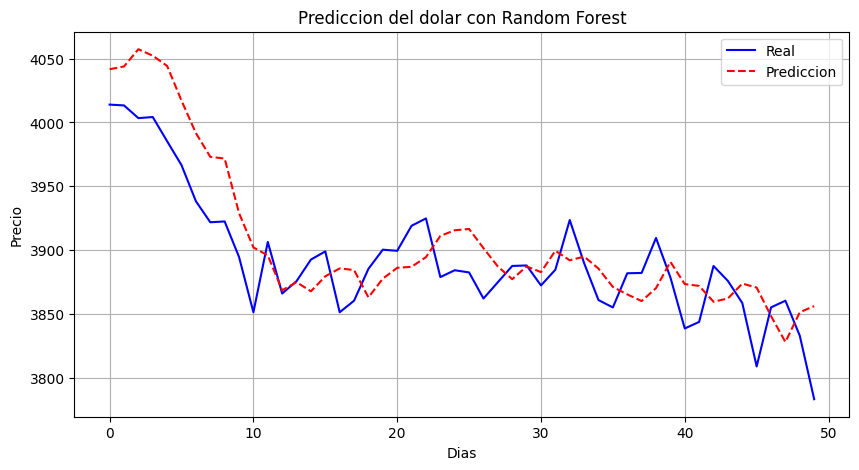


HOY: $3833
MAÑANA (precio): $3856
SVM dice: BAJA


In [ ]:
#Es este SEBAAAAAS :DDDDD
# PROYECTO DE ML PARA PREDECIR PRECIO DEL DOLAR
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, accuracy_score
import yfinance as yf


# CARGAR Y LIMPIAR LOS DATOS
class DatosDolar:
    def __init__(self):
        self.df = None

    def bajar_datos(self):
        print("Bajando datos del dolar...")
        try:
            data = yf.download('USDCOP=X', period='2y', progress=False)
            self.df = data[['Close']].copy()
            self.df.columns = ['dolar']
        except:
            print("No se pudo bajar, uso datos falsos")
            fechas = pd.date_range(end='2025-11-06', periods=500)
            precios = 4000 + np.cumsum(np.random.normal(0, 20, 500))
            self.df = pd.DataFrame({'dolar': precios}, index=fechas)

    def hacer_features(self):
        print("Haciendo columnas...")
        self.df['ayer'] = self.df['dolar'].shift(1)
        self.df['ma5'] = self.df['dolar'].rolling(5).mean()
        self.df['ma20'] = self.df['dolar'].rolling(20).mean()

        # volatilidad
        self.df['retorno'] = self.df['dolar'].pct_change()
        self.df['volatilidad'] = self.df['retorno'].rolling(20).std()

        # rsi (lo copie)
        delta = self.df['dolar'].diff()
        up = delta.where(delta > 0, 0).rolling(14).mean()
        down = -delta.where(delta < 0, 0).rolling(14).mean()
        self.df['rsi'] = 100 - (100 / (1 + up/down))

        self.df = self.df.dropna()
        print(f"Listo, tengo {len(self.df)} filas")


# REGRESION CON RANDOM FOREST
class ModeloPrecio:
    def __init__(self):
        self.modelo = RandomForestRegressor(n_estimators=50, random_state=42)
        self.features = ['ayer', 'ma5', 'ma20', 'volatilidad', 'rsi']

    def entrenar(self, X_train, y_train):
        print("Entrenando Random Forest para precio...")
        self.modelo.fit(X_train, y_train)

    def predecir(self, X):
        return self.modelo.predict(X)

    def error(self, y_real, y_pred):
        return mean_absolute_error(y_real, y_pred)


# CLASIFICACION CON SVM
class ModeloSubeBaja:
    def __init__(self):
        self.modelo = SVC(kernel='rbf', C=1.0)
        self.scaler = StandardScaler()
        self.features = ['ayer', 'ma5', 'ma20', 'volatilidad', 'rsi']

    def entrenar(self, X_train, y_train):
        print("Entrenando SVM para sube/baja...")
        X_scaled = self.scaler.fit_transform(X_train)
        self.modelo.fit(X_scaled, y_train)

    def predecir(self, X):
        X_scaled = self.scaler.transform(X)
        return self.modelo.predict(X_scaled)

    def acierto(self, y_real, y_pred):
        return accuracy_score(y_real, y_pred)


# FUNCIONES DE AYUDA
def dividir_datos(df, test_size=0.2):
    split = int(len(df) * (1 - test_size))
    train = df.iloc[:split]
    test = df.iloc[split:]
    return train, test

def graficar_prediccion(real, predicho, titulo):
    plt.figure(figsize=(10,5))
    plt.plot(real[-50:], label='Real', color='blue')
    plt.plot(predicho[-50:], label='Prediccion', color='red', linestyle='--')
    plt.title(titulo)
    plt.xlabel('Dias')
    plt.ylabel('Precio')
    plt.legend()
    plt.grid()
    plt.show()


# =============================================
# MAIN - AQUI CORRE TODO
# =============================================
if __name__ == "__main__":

    # 1. CARGAR DATOS
    datos = DatosDolar()
    datos.bajar_datos()
    datos.hacer_features()

    # 2. PREPARAR TARGETS
    datos.df['precio_mañana'] = datos.df['dolar'].shift(-1)
    datos.df['sube'] = (datos.df['precio_mañana'] > datos.df['dolar']).astype(int)
    datos.df = datos.df[:-1]  # quito ultima fila

    # 3. DIVIDIR
    train_df, test_df = dividir_datos(datos.df)

    X_train = train_df[['ayer', 'ma5', 'ma20', 'volatilidad', 'rsi']].values
    X_test = test_df[['ayer', 'ma5', 'ma20', 'volatilidad', 'rsi']].values

    y_precio_train = train_df['precio_mañana'].values
    y_precio_test = test_df['precio_mañana'].values

    y_clase_train = train_df['sube'].values
    y_clase_test = test_df['sube'].values

    # 4. REGRESION
    modelo_p = ModeloPrecio()
    modelo_p.entrenar(X_train, y_precio_train)
    pred_train_p = modelo_p.predecir(X_train)
    pred_test_p = modelo_p.predecir(X_test)

    print(f"Error precio train: {modelo_p.error(y_precio_train, pred_train_p):.0f}")
    print(f"Error precio test: {modelo_p.error(y_precio_test, pred_test_p):.0f}")

    # 5. CLASIFICACION
    modelo_c = ModeloSubeBaja()
    modelo_c.entrenar(X_train, y_clase_train)
    pred_clase = modelo_c.predecir(X_test)
    print(f"Acierto sube/baja: {modelo_c.acierto(y_clase_test, pred_clase):.1%}")

    # 6. GRAFICO
    graficar_prediccion(y_precio_test, pred_test_p, "Prediccion del dolar con Random Forest")

    # 7. PREDICCION MAÑANA
    hoy = datos.df[['ayer', 'ma5', 'ma20', 'volatilidad', 'rsi']].iloc[-1:].values
    mañana_precio = modelo_p.predecir(hoy)[0]
    mañana_sube = modelo_c.predecir(hoy)[0]

    print(f"\nHOY: ${datos.df['dolar'].iloc[-1]:.0f}")
    print(f"MAÑANA (precio): ${mañana_precio:.0f}")
    print(f"SVM dice: {'SUBE' if mañana_sube else 'BAJA'}")

In [ ]:
# INSTALACIÓN DE LIBRERÍAS (una sola vez)
# pip install plotly yfinance
# plotly = para gráficos interactivos con hover
# yfinance = para bajar precios reales del mercado

# PROYECTO DE ML PARA EL CAFE
# Uso Random Forest (regresión) y SVM (clasificación)
# Datos reales del café (KC=F) desde Yahoo Finance

import pandas as pd                    # para manejar datos como tablas (DataFrames)
import numpy as np                     # para cálculos matemáticos y arreglos
import plotly.graph_objects as go      # para hacer gráficos interactivos con hover
from sklearn.ensemble import RandomForestRegressor  # modelo de regresión (predice números)
from sklearn.svm import SVC            # modelo de clasificación (predice sube/baja)
from sklearn.preprocessing import StandardScaler    # para escalar datos (necesario para SVM)
from sklearn.metrics import mean_absolute_error, accuracy_score  # métricas de error y acierto
import yfinance as yf                  # para bajar precios reales del mercado


# =============================================
# CLASE 1: DATOS DEL CAFÉ
# =============================================
class DatosCafe:
    def __init__(self):
        self.df = None                 # inicializo el DataFrame vacío

    def bajar_datos(self):
        print("Bajando datos reales del café (KC=F)...")
        # KC=F = futuros de café arábica en el mercado internacional
        # period='2y' = últimos 2 años de precios diarios
        # progress=False = no muestra barra de carga
        try:
            data = yf.download('KC=F', period='2y', progress=False)
            # Solo usamos la columna 'Close' (precio de cierre del día)
            self.df = data[['Close']].copy()
            self.df.columns = ['cafe']     # renombramos a 'cafe' para que sea claro
            self.df = self.df.dropna()     # quitamos filas con datos vacíos
        except:
            # Si no hay internet o falla, uso datos simulados
            print("Error, uso datos falsos")
            fechas = pd.date_range(end='2025-11-06', periods=500)  # 500 días
            # Simulo precios con tendencia y ruido
            precios = 380 + np.cumsum(np.random.normal(0, 8, 500))
            self.df = pd.DataFrame({'cafe': precios}, index=fechas)

    def hacer_features(self):
        print("Creando features (columnas predictoras)...")
        # 'ayer' = precio del día anterior
        self.df['ayer'] = self.df['cafe'].shift(1)

        # Medias móviles: promedio de últimos 5 y 20 días
        self.df['ma5'] = self.df['cafe'].rolling(5).mean()
        self.df['ma20'] = self.df['cafe'].rolling(20).mean()

        # Retorno diario: % de cambio del precio
        self.df['retorno'] = self.df['cafe'].pct_change()

        # Volatilidad: cuánto varía el precio (desviación estándar de retornos)
        self.df['volatilidad'] = self.df['retorno'].rolling(20).std()

        # RSI (Relative Strength Index): mide si está sobrecomprado o sobrevendido
        delta = self.df['cafe'].diff()                    # diferencia entre días
        up = delta.where(delta > 0, 0).rolling(14).mean()  # ganancias promedio
        down = -delta.where(delta < 0, 0).rolling(14).mean() # pérdidas promedio
        self.df['rsi'] = 100 - (100 / (1 + up/down))      # fórmula del RSI

        # Quitamos filas con NaN (porque shift y rolling generan vacíos al inicio)
        self.df = self.df.dropna()
        print(f"Listo: {len(self.df)} filas con datos limpios")


# =============================================
# CLASE 2: MODELO DE PRECIO (REGRESIÓN)
# =============================================
class ModeloPrecio:
    def __init__(self):
        # Random Forest = conjunto de árboles de decisión que votan
        # n_estimators=50 = uso 50 árboles
        # random_state=42 = para que siempre dé el mismo resultado
        self.modelo = RandomForestRegressor(n_estimators=50, random_state=42)
        self.features = ['ayer', 'ma5', 'ma20', 'volatilidad', 'rsi']  # columnas que uso

    def entrenar(self, X, y):
        print("Entrenando Random Forest para predecir el precio...")
        # X = features, y = precio mañana
        self.modelo.fit(X, y)  # el modelo aprende de los datos

    def predecir(self, X):
        # Devuelve el precio que predice el modelo
        return self.modelo.predict(X)


# =============================================
# CLASE 3: MODELO SUBE/BAJA (CLASIFICACIÓN)
# =============================================
class ModeloSubeBaja:
    def __init__(self):
        # SVC = Support Vector Classifier
        # kernel='rbf' = permite fronteras curvas (mejor para datos reales)
        # C=1.0 = controla cuánto penaliza errores
        self.modelo = SVC(kernel='rbf', C=1.0)
        self.scaler = StandardScaler()  # SVM necesita datos escalados

    def entrenar(self, X, y):
        print("Entrenando SVM para decir si sube o baja...")
        # Escalo los datos (media=0, desviación=1)
        X_scaled = self.scaler.fit_transform(X)
        # y = 1 si sube, 0 si baja
        self.modelo.fit(X_scaled, y)

    def predecir(self, X):
        # Escalo los nuevos datos antes de predecir
        X_scaled = self.scaler.transform(X)
        return self.modelo.predict(X_scaled)  # devuelve 1 o 0


# =============================================
# FUNCIÓN PARA DIVIDIR DATOS
# =============================================
def dividir_datos(df, test_size=0.2):
    # test_size=0.2 = 20% para prueba, 80% para entrenamiento
    split = int(len(df) * (1 - test_size))
    # iloc = selección por posición
    return df.iloc[:split], df.iloc[split:]  # devuelve train y test


# =============================================
# MAIN - AQUÍ CORRE TODO EL PROGRAMA
# =============================================
if __name__ == "__main__":

    # 1. CARGAR Y PREPARAR DATOS
    datos = DatosCafe()           # creo un objeto de la clase
    datos.bajar_datos()           # bajo precios reales
    datos.hacer_features()        # creo features

    # 2. CREAR TARGETS (lo que quiero predecir)
    # precio_mañana = precio del día siguiente
    datos.df['precio_mañana'] = datos.df['cafe'].shift(-1)
    # sube = 1 si mañana > hoy, 0 si no
    datos.df['sube'] = (datos.df['precio_mañana'] > datos.df['cafe']).astype(int)
    # quito la última fila (no tiene precio_mañana)
    datos.df = datos.df[:-1]

    # 3. DIVIDIR EN TRAIN Y TEST
    train_df, test_df = dividir_datos(datos.df)

    # X = features (lo que entra al modelo)
    X_train = train_df[['ayer', 'ma5', 'ma20', 'volatilidad', 'rsi']].values
    X_test = test_df[['ayer', 'ma5', 'ma20', 'volatilidad', 'rsi']].values

    # y = target (lo que quiero predecir)
    y_precio_train = train_df['precio_mañana'].values
    y_precio_test = test_df['precio_mañana'].values
    y_clase_train = train_df['sube'].values
    y_clase_test = test_df['sube'].values

    # 4. REGRESIÓN: PREDECIR PRECIO EXACTO
    modelo_p = ModeloPrecio()              # creo el modelo
    modelo_p.entrenar(X_train, y_precio_train)  # lo entreno
    pred_test_p = modelo_p.predecir(X_test)     # predigo en test

    # MAE = Mean Absolute Error: error promedio en USD
    mae = mean_absolute_error(y_precio_test, pred_test_p)
    print(f"Error en test: {mae:.1f} USD/Lbs")  # cuanto se equivoca en promedio

    # 5. CLASIFICACIÓN: ¿SUBE O BAJA?
    modelo_c = ModeloSubeBaja()
    modelo_c.entrenar(X_train, y_clase_train)
    pred_clase = modelo_c.predecir(X_test)
    # Accuracy = % de aciertos
    acc = accuracy_score(y_clase_test, pred_clase)
    print(f"Acierto sube/baja: {acc:.1%}")

    # =============================================
    # GRÁFICO INTERACTIVO CON HOVER
    # =============================================
    # Fechas del período de prueba
    fechas = test_df.index.strftime('%Y-%m-%d').tolist()

    # Texto que aparece al pasar el cursor (hover)
    hover_text = []
    for i in range(len(y_precio_test)):
        fecha = fechas[i]
        real = y_precio_test[i]
        pred = pred_test_p[i]
        error = abs(real - pred)
        # <br> = salto de línea en HTML
        texto = f"<b>Fecha:</b> {fecha}<br>" \
                f"<b>Real:</b> ${real:.2f}<br>" \
                f"<b>Pred:</b> ${pred:.2f}<br>" \
                f"<b>Error:</b> ${error:.2f}"
        hover_text.append(texto)

    # Datos para el gráfico (solo últimos 100 días)
    data = [
        go.Scatter(
            x=fechas[-100:],           # eje X: fechas
            y=y_precio_test[-100:],    # eje Y: precio real
            mode='lines',              # línea continua
            name='Precio Real',
            line=dict(color='blue'),
            hoverinfo='text',          # muestra el hovertext
            hovertext=hover_text[-100:]
        ),
        go.Scatter(
            x=fechas[-100:],
            y=pred_test_p[-100:],
            mode='lines',
            name='Predicción RF',      # RF = Random Forest
            line=dict(color='red', dash='dash'),  # línea punteada
            hoverinfo='text',
            hovertext=hover_text[-100:]
        )
    ]

    # Diseño del gráfico
    layout = go.Layout(
        title="Predicción del Precio del Café (Hover para ver datos)",
        xaxis=dict(title="Fecha"),
        yaxis=dict(title="Precio (USD por Libra)"),
        hovermode='x unified'      # muestra ambos valores al pasar el cursor
    )

    fig = go.Figure(data=data, layout=layout)
    fig.show()  # abre en el navegador o en Jupyter

    # =============================================
    # PREDICCIÓN PARA MAÑANA
    # =============================================
    # Última fila con features
    hoy = datos.df[['ayer', 'ma5', 'ma20', 'volatilidad', 'rsi']].iloc[-1:].values
    mañana = modelo_p.predecir(hoy)[0]      # precio que predice RF
    sube = modelo_c.predecir(hoy)[0]        # 1=sube, 0=baja

    print(f"\nHOY: ${datos.df['cafe'].iloc[-1]:.2f} USD/Lbs")
    print(f"MAÑANA: ${mañana:.2f} USD/Lbs")
    print(f"SVM: {'SUBE' if sube else 'BAJA'}")

Bajando datos reales del café (KC=F)...
Creando features (columnas predictoras)...
Listo: 486 filas con datos limpios
Entrenando Random Forest para predecir el precio...


/tmp/ipython-input-11413257.py:33: FutureWarning:

YF.download() has changed argument auto_adjust default to True



Error en test: 15.3 USD/Lbs
Entrenando SVM para decir si sube o baja...
Acierto sube/baja: 50.5%



HOY: $413.60 USD/Lbs
MAÑANA: $399.19 USD/Lbs
SVM: BAJA


In [ ]:
!pip install plotly yfinance

# PROYECTO DE ML PARA EL CAFE

import pandas as pd
import numpy as np
import plotly.graph_objects as go
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, accuracy_score
import yfinance as yf


# =============================================
# CLASE 1: DATOS DEL CAFE
# =============================================
class DatosCafe:
    def __init__(self):
        self.df = None

    def bajar_datos(self):
        print("Bajando datos reales del cafe (KC=F)...")
        try:
            data = yf.download('KC=F', period='2y', progress=False)
            self.df = data[['Close']].copy()
            self.df.columns = ['cafe']
            self.df = self.df.dropna()
        except:
            print("Error, uso datos falsos")
            fechas = pd.date_range(end='2025-11-06', periods=500)
            precios = 380 + np.cumsum(np.random.normal(0, 8, 500))
            self.df = pd.DataFrame({'cafe': precios}, index=fechas)

    def hacer_features(self):
        print("Creando features...")
        self.df['ayer'] = self.df['cafe'].shift(1)
        self.df['ma5'] = self.df['cafe'].rolling(5).mean()
        self.df['ma20'] = self.df['cafe'].rolling(20).mean()

        self.df['retorno'] = self.df['cafe'].pct_change()
        self.df['volatilidad'] = self.df['retorno'].rolling(20).std()

        delta = self.df['cafe'].diff()
        up = delta.where(delta > 0, 0).rolling(14).mean()
        down = -delta.where(delta < 0, 0).rolling(14).mean()
        self.df['rsi'] = 100 - (100 / (1 + up/down))

        self.df = self.df.dropna()
        print(f"Listo: {len(self.df)} filas")


# =============================================
# CLASE 2: MODELO DE PRECIO
# =============================================
class ModeloPrecio:
    def __init__(self):
        self.modelo = RandomForestRegressor(n_estimators=50, random_state=42)
        self.features = ['ayer', 'ma5', 'ma20', 'volatilidad', 'rsi']

    def entrenar(self, X, y):
        print("Entrenando Random Forest...")
        self.modelo.fit(X, y)

    def predecir(self, X):
        return self.modelo.predict(X)


# =============================================
# CLASE 3: MODELO SUBE/BAJA
# =============================================
class ModeloSubeBaja:
    def __init__(self):
        self.modelo = SVC(kernel='rbf', C=1.0)
        self.scaler = StandardScaler()

    def entrenar(self, X, y):
        print("Entrenando SVM...")
        X_scaled = self.scaler.fit_transform(X)
        self.modelo.fit(X_scaled, y)

    def predecir(self, X):
        X_scaled = self.scaler.transform(X)
        return self.modelo.predict(X_scaled)


# =============================================
# FUNCION PARA DIVIDIR
# =============================================
def dividir_datos(df, test_size=0.2):
    split = int(len(df) * (1 - test_size))
    return df.iloc[:split], df.iloc[split:]


# =============================================
# MAIN
# =============================================
if __name__ == "__main__":

    # 1. DATOS
    datos = DatosCafe()
    datos.bajar_datos()
    datos.hacer_features()

    # 2. TARGETS
    datos.df['precio_mañana'] = datos.df['cafe'].shift(-1)
    datos.df['sube'] = (datos.df['precio_mañana'] > datos.df['cafe']).astype(int)
    datos.df = datos.df[:-1]

    # 3. DIVIDIR
    train_df, test_df = dividir_datos(datos.df)

    X_train = train_df[['ayer', 'ma5', 'ma20', 'volatilidad', 'rsi']].values
    X_test  = test_df[['ayer', 'ma5', 'ma20', 'volatilidad', 'rsi']].values

    y_precio_train = train_df['precio_mañana'].values
    y_precio_test  = test_df['precio_mañana'].values

    y_clase_train = train_df['sube'].values
    y_clase_test  = test_df['sube'].values

    # 4. REGRESION
    modelo_p = ModeloPrecio()
    modelo_p.entrenar(X_train, y_precio_train)
    pred_test_p = modelo_p.predecir(X_test)

    mae = mean_absolute_error(y_precio_test, pred_test_p)
    print(f"Error en test: {mae:.1f} USD/Lbs")

    # 5. CLASIFICACION
    modelo_c = ModeloSubeBaja()
    modelo_c.entrenar(X_train, y_clase_train)
    pred_clase = modelo_c.predecir(X_test)
    acc = accuracy_score(y_clase_test, pred_clase)
    print(f"Acierto sube/baja: {acc:.1%}")

    # =========================================================
    # TABLA DESCRIPTIVA (en español) + MAE
    # =========================================================
    vars_desc = ['cafe', 'ayer', 'ma5', 'ma20', 'volatilidad']
    nombres_bonitos = {
        'cafe': 'Precio café (USD/Lb)',
        'ayer': 'Ayer',
        'ma5': 'Prom. 5 días',
        'ma20': 'Prom. 20 días',
        'volatilidad': 'Volatilidad 20 días'
    }

    desc = datos.df[vars_desc].describe().loc[['mean','50%','std','min','max']].rename(index={'50%':'median'})
    desc = desc.round(4)

    # Renombramos filas al español
    ren_idx = {'mean':'Media', 'median':'Mediana', 'std':'Desv. estándar', 'min':'Mínimo', 'max':'Máximo'}
    resumen = desc.rename(index=ren_idx).copy()
    resumen.loc['MAE (test)'] = np.nan
    resumen.loc['MAE (test)', 'cafe'] = round(mae, 4)

    # Construcción de la tabla con cabeceras en español
    header_vals = ['Estadística'] + [nombres_bonitos[c] for c in vars_desc]
    cell_cols = [resumen.index.tolist()] + [resumen[c].tolist() for c in vars_desc]

    tabla = go.Figure(data=[go.Table(
        header=dict(values=header_vals, fill_color='#1f77b4', font_color='white', align='center'),
        cells=dict(values=cell_cols, fill_color='lavender', align='center')
    )])
    tabla.update_layout(title="Resumen descriptivo de variables")
    tabla.show()

    # =========================================================
    # OPCIÓN A: REAL vs PREDICHO (nube + línea 45°)
    # =========================================================
    scatter_hover = [
        (f"<b>Real:</b> ${y_precio_test[i]:.2f}<br>"
         f"<b>Predicho:</b> ${pred_test_p[i]:.2f}<br>"
         f"<b>Error:</b> ${abs(y_precio_test[i]-pred_test_p[i]):.2f}")
        for i in range(len(y_precio_test))
    ]

    min_val = float(min(y_precio_test.min(), pred_test_p.min()))
    max_val = float(max(y_precio_test.max(), pred_test_p.max()))

    fig_scatter = go.Figure()
    fig_scatter.add_trace(go.Scatter(
        x=y_precio_test, y=pred_test_p,
        mode='markers',
        name='Puntos (test)',
        marker=dict(color='rgba(31,119,180,0.6)', size=7),
        hoverinfo='text', hovertext=scatter_hover
    ))
    fig_scatter.add_trace(go.Scatter(
        x=[min_val, max_val], y=[min_val, max_val],
        mode='lines', name='Línea ideal (y=x)',
        line=dict(color='orange', dash='dash')
    ))
    fig_scatter.update_layout(
        title="Precio real vs. predicho (test)",
        xaxis_title="Real (USD/Lb)",
        yaxis_title="Predicho (USD/Lb)",
        hovermode='closest'
    )
    fig_scatter.show()

    # =============================================
    # GRAFICO CON HOVER (COMO ME ENSEÑARON)
    # =============================================
    # Fechas del test
    fechas = test_df.index.strftime('%Y-%m-%d').tolist()

    # Hover text: fecha + real + pred + error
    hover_text = []
    for i in range(len(y_precio_test)):
        fecha = fechas[i]
        real = y_precio_test[i]
        pred = pred_test_p[i]
        error = abs(real - pred)
        texto = (f"<b>Fecha:</b> {fecha}<br>"
                 f"<b>Real:</b> ${real:.2f}<br>"
                 f"<b>Pred:</b> ${pred:.2f}<br>"
                 f"<b>Error:</b> ${error:.2f}")
        hover_text.append(texto)

    # Datos para Plotly
    data = [
        go.Scatter(
            x=fechas[-100:],  # últimos 100 días
            y=y_precio_test[-100:],
            mode='lines',
            name='Precio Real',
            line=dict(color='blue'),
            hoverinfo='text',
            hovertext=hover_text[-100:]
        ),
        go.Scatter(
            x=fechas[-100:],
            y=pred_test_p[-100:],
            mode='lines',
            name='Predicción RF',
            line=dict(color='red', dash='dash'),
            hoverinfo='text',
            hovertext=hover_text[-100:]
        )
    ]

    # Layout
    layout = go.Layout(
        title="Predicción del Precio del Café (Hover para ver datos)",
        xaxis=dict(title="Fecha"),
        yaxis=dict(title="Precio (USD por Libra)"),
        hovermode='x unified'  # muestra ambos valores al pasar cursor
    )

    fig = go.Figure(data=data, layout=layout)
    fig.show()  # abre en navegador o Jupyter

    # =============================================
    # PREDICCION MAÑANA
    # =============================================
    hoy = datos.df[['ayer', 'ma5', 'ma20', 'volatilidad', 'rsi']].iloc[-1:].values
    mañana = modelo_p.predecir(hoy)[0]
    sube = modelo_c.predecir(hoy)[0]

    print(f"\nHOY: ${datos.df['cafe'].iloc[-1]:.2f} USD/Lbs")
    print(f"MAÑANA: ${mañana:.2f} USD/Lbs")
    print(f"SVM: {'SUBE' if sube else 'BAJA'}")


Bajando datos reales del cafe (KC=F)...
Creando features...
Listo: 486 filas
Entrenando Random Forest...


/tmp/ipython-input-898543056.py:25: FutureWarning:

YF.download() has changed argument auto_adjust default to True



Error en test: 15.3 USD/Lbs
Entrenando SVM...
Acierto sube/baja: 50.5%



HOY: $413.60 USD/Lbs
MAÑANA: $399.19 USD/Lbs
SVM: BAJA


In [11]:
!pip install plotly yfinance  # Instala las librerías necesarias (solo la primera vez)

# PROYECTO DE MACHINE LEARNING: PRECIO DEL CAFÉ


import pandas as pd                # Para manejo de datos (tablas)
import numpy as np                 # Para cálculos numéricos
import plotly.graph_objects as go  # Para gráficos interactivos
from sklearn.ensemble import RandomForestRegressor  # Modelo de regresión
from sklearn.svm import SVC                          # Modelo de clasificación (sube/baja)
from sklearn.preprocessing import StandardScaler     # Escala datos para el SVM
from sklearn.metrics import mean_absolute_error, accuracy_score  # Métricas del modelo
import yfinance as yf             # Librería para descargar datos financieros reales


# DATOS DEL CAFÉ
class DatosCafe:
    def __init__(self):
        self.df = None  # Aquí se guardará el DataFrame de los datos

    def bajar_datos(self):
        """Descarga los datos históricos del café desde Yahoo Finance"""
        print("Bajando datos reales del cafe (KC=F)...")
        try:
            # Descarga el precio de cierre del futuro del café (KC=F)
            data = yf.download('KC=F', period='2y', progress=False)
            self.df = data[['Close']].copy()  # Toma solo la columna "Close"
            self.df.columns = ['cafe']        # Renombra a 'cafe'
            self.df = self.df.dropna()        # Elimina filas vacías
        except:
            # Si falla la descarga, genera datos simulados
            print("Error, uso datos falsos")
            fechas = pd.date_range(end='2025-11-06', periods=500)
            precios = 380 + np.cumsum(np.random.normal(0, 8, 500))
            self.df = pd.DataFrame({'cafe': precios}, index=fechas)

    def hacer_features(self):
        """Crea columnas adicionales (variables) que ayudan al modelo"""
        print("Creando features...")
        self.df['ayer'] = self.df['cafe'].shift(1)         # Precio del día anterior
        self.df['ma5'] = self.df['cafe'].rolling(5).mean()  # Promedio móvil 5 días
        self.df['ma20'] = self.df['cafe'].rolling(20).mean()# Promedio móvil 20 días

        # Cálculo de volatilidad y RSI
        self.df['retorno'] = self.df['cafe'].pct_change()   # Variación porcentual diaria
        self.df['volatilidad'] = self.df['retorno'].rolling(20).std()  # Volatilidad 20 días

        # RSI (indicador técnico de fuerza relativa)
        delta = self.df['cafe'].diff()
        up = delta.where(delta > 0, 0).rolling(14).mean()
        down = -delta.where(delta < 0, 0).rolling(14).mean()
        self.df['rsi'] = 100 - (100 / (1 + up / down))

        self.df = self.df.dropna()  # Elimina valores vacíos
        print(f"Listo: {len(self.df)} filas")  # Muestra cantidad final de datos


# MODELO DE REGRESIÓN (PREDECIR PRECIO)
class ModeloPrecio:
    def __init__(self):
        # Crea un modelo de Random Forest (bosque aleatorio)
        self.modelo = RandomForestRegressor(n_estimators=50, random_state=42)
        self.features = ['ayer', 'ma5', 'ma20', 'volatilidad', 'rsi']  # Variables a usar

    def entrenar(self, X, y):
        """Entrena el modelo con los datos históricos"""
        print("Entrenando Random Forest...")
        self.modelo.fit(X, y)

    def predecir(self, X):
        """Hace predicciones con los datos nuevos"""
        return self.modelo.predict(X)


# MODELO DE CLASIFICACIÓN (SUBE/BAJA)
class ModeloSubeBaja:
    def __init__(self):
        self.modelo = SVC(kernel='rbf', C=1.0)  # Clasificador tipo SVM
        self.scaler = StandardScaler()          # Normaliza los datos

    def entrenar(self, X, y):
        """Entrena el modelo SVM para saber si el café sube o baja"""
        print("Entrenando SVM...")
        X_scaled = self.scaler.fit_transform(X)  # Escala los datos
        self.modelo.fit(X_scaled, y)

    def predecir(self, X):
        """Predice si el precio sube (1) o baja (0)"""
        X_scaled = self.scaler.transform(X)
        return self.modelo.predict(X_scaled)


# FUNCION PARA DIVIDIR DATOS EN TRAIN Y TEST
def dividir_datos(df, test_size=0.2):
    """Separa los datos en entrenamiento y prueba"""
    split = int(len(df) * (1 - test_size))
    return df.iloc[:split], df.iloc[split:]


# PROGRAMA PRINCIPAL
if __name__ == "__main__":

    # 1. DESCARGAR Y PREPARAR DATOS
    datos = DatosCafe()
    datos.bajar_datos()
    datos.hacer_features()

    # 2. CREAR VARIABLES OBJETIVO
    datos.df['precio_mañana'] = datos.df['cafe'].shift(-1)               # Valor del siguiente día
    datos.df['sube'] = (datos.df['precio_mañana'] > datos.df['cafe']).astype(int)  # Si sube = 1, baja = 0
    datos.df = datos.df[:-1]  # Elimina la última fila (no tiene valor de "mañana")

    # 3. DIVIDIR DATOS EN TRAIN Y TEST
    train_df, test_df = dividir_datos(datos.df)

    # Variables predictoras (X) y objetivo (y)
    X_train = train_df[['ayer', 'ma5', 'ma20', 'volatilidad', 'rsi']].values
    X_test  = test_df[['ayer', 'ma5', 'ma20', 'volatilidad', 'rsi']].values

    y_precio_train = train_df['precio_mañana'].values
    y_precio_test  = test_df['precio_mañana'].values

    y_clase_train = train_df['sube'].values
    y_clase_test  = test_df['sube'].values

    # 4. ENTRENAR MODELO DE REGRESIÓN
    modelo_p = ModeloPrecio()
    modelo_p.entrenar(X_train, y_precio_train)
    pred_test_p = modelo_p.predecir(X_test)

    # Calcular error promedio (MAE)
    mae = mean_absolute_error(y_precio_test, pred_test_p)
    print(f"Error en test: {mae:.1f} USD/Lbs")

    # 5. ENTRENAR MODELO DE CLASIFICACIÓN
    modelo_c = ModeloSubeBaja()
    modelo_c.entrenar(X_train, y_clase_train)
    pred_clase = modelo_c.predecir(X_test)
    acc = accuracy_score(y_clase_test, pred_clase)
    print(f"Acierto sube/baja: {acc:.1%}")

    # TABLA DESCRIPTIVA
    vars_desc = ['cafe', 'ayer', 'ma5', 'ma20', 'volatilidad']
    nombres_bonitos = {
        'cafe': 'Precio café (USD/Lb)',
        'ayer': 'Ayer',
        'ma5': 'Prom. 5 días',
        'ma20': 'Prom. 20 días',
        'volatilidad': 'Volatilidad 20 días'
    }

    # Estadísticas básicas de las variables
    desc = datos.df[vars_desc].describe().loc[['mean','50%','std','min','max']].rename(index={'50%':'median'})
    desc = desc.round(4)

    # Renombra filas y agrega el MAE del test
    ren_idx = {'mean':'Media', 'median':'Mediana', 'std':'Desv. estándar', 'min':'Mínimo', 'max':'Máximo'}
    resumen = desc.rename(index=ren_idx).copy()
    resumen.loc['MAE (test)'] = np.nan
    resumen.loc['MAE (test)', 'cafe'] = round(mae, 4)

    # Crea la tabla visual con Plotly
    header_vals = ['Estadística'] + [nombres_bonitos[c] for c in vars_desc]
    cell_cols = [resumen.index.tolist()] + [resumen[c].tolist() for c in vars_desc]

    tabla = go.Figure(data=[go.Table(
        header=dict(values=header_vals, fill_color='#1f77b4', font_color='white', align='center'),
        cells=dict(values=cell_cols, fill_color='lavender', align='center')
    )])
    tabla.update_layout(title="Resumen descriptivo de variables")
    tabla.show()


    # GRAFICO DE SERIES CON HOVER (ÚLTIMOS 100 DÍAS)
    fechas = test_df.index.strftime('%Y-%m-%d').tolist()  # Fechas del test

    hover_text = []  # Crea texto para cada punto
    for i in range(len(y_precio_test)):
        fecha = fechas[i]
        real = y_precio_test[i]
        pred = pred_test_p[i]
        error = abs(real - pred)
        texto = (f"<b>Fecha:</b> {fecha}<br>"
                 f"<b>Real:</b> ${real:.2f}<br>"
                 f"<b>Pred:</b> ${pred:.2f}<br>"
                 f"<b>Error:</b> ${error:.2f}")
        hover_text.append(texto)

    # Serie real y predicha (últimos 100 días)
    data = [
        go.Scatter(
            x=fechas[-100:], y=y_precio_test[-100:],
            mode='lines', name='Precio Real',
            line=dict(color='blue'),
            hoverinfo='text', hovertext=hover_text[-100:]
        ),
        go.Scatter(
            x=fechas[-100:], y=pred_test_p[-100:],
            mode='lines', name='Predicción RF',
            line=dict(color='red', dash='dash'),
            hoverinfo='text', hovertext=hover_text[-100:]
        )
    ]

    layout = go.Layout(
        title="Predicción del Precio del Café (Hover para ver datos)",
        xaxis=dict(title="Fecha"),
        yaxis=dict(title="Precio (USD por Libra)"),
        hovermode='x unified'  # Muestra valores juntos al pasar el cursor
    )

    fig = go.Figure(data=data, layout=layout)
    fig.show()

    # PREDICCIÓN PARA MAÑANA
    hoy = datos.df[['ayer', 'ma5', 'ma20', 'volatilidad', 'rsi']].iloc[-1:].values
    mañana = modelo_p.predecir(hoy)[0]         # Predicción de precio
    sube = modelo_c.predecir(hoy)[0]           # Predicción si sube o baja

    # Mostrar resultados en consola
    print(f"\nHOY: ${datos.df['cafe'].iloc[-1]:.2f} USD/Lbs")
    print(f"MAÑANA: ${mañana:.2f} USD/Lbs")
    print(f"SVM: {'SUBE' if sube else 'BAJA'}")


Bajando datos reales del cafe (KC=F)...
Creando features...
Listo: 486 filas
Entrenando Random Forest...


/tmp/ipython-input-2712719245.py:26: FutureWarning:

YF.download() has changed argument auto_adjust default to True



Error en test: 15.3 USD/Lbs
Entrenando SVM...
Acierto sube/baja: 50.5%



HOY: $413.60 USD/Lbs
MAÑANA: $399.19 USD/Lbs
SVM: BAJA
